In [63]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.XGboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [125]:
train = pd.read_csv(r'C:/Hackothon/Amex/train.csv')
test = pd.read_csv(r'C:/Hackothon/Amex/test.csv') 
transaction = pd.read_csv(r'C:/Hackothon/Amex/customer_transaction_data.csv')
customer = pd.read_csv(r'C:/Hackothon/Amex/customer_demographics.csv')
campaign = pd.read_csv(r'C:/Hackothon/Amex/campaign_data.csv') 
item = pd.read_csv(r'C:/Hackothon/Amex/item_data.csv') 

In [5]:
train.shape

(78369, 5)

In [6]:
test.shape

(50226, 4)

In [23]:
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [9]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [16]:
train.isnull().sum()

id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64

In [29]:
for k in train.columns:
    print(k,train[k].nunique())

id 78369
campaign_id 18
coupon_id 866
customer_id 1428
redemption_status 2


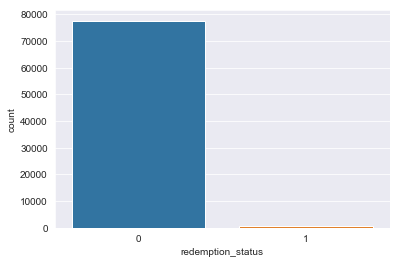

In [27]:
sns.countplot(train['redemption_status']);

In [32]:
is4G = train['campaign_id'].unique()
is4G.sort()
ctr_avg_list=[]
for i in is4G:
    ctr_avg=train.loc[np.where((train['campaign_id'] == i))]['redemption_status'].mean()
    ctr_avg_list.append(ctr_avg)
    print("for campaign_id: {},  click through rate: {}".format(i,ctr_avg))

for campaign_id: 1,  click through rate: 0.006993006993006993
for campaign_id: 2,  click through rate: 0.006510416666666667
for campaign_id: 3,  click through rate: 0.004901960784313725
for campaign_id: 4,  click through rate: 0.00720164609053498
for campaign_id: 5,  click through rate: 0.0038314176245210726
for campaign_id: 6,  click through rate: 0.015384615384615385
for campaign_id: 7,  click through rate: 0.0025252525252525255
for campaign_id: 8,  click through rate: 0.008822877410773665
for campaign_id: 9,  click through rate: 0.00726010101010101
for campaign_id: 10,  click through rate: 0.004062681369704005
for campaign_id: 11,  click through rate: 0.002156721782890007
for campaign_id: 12,  click through rate: 0.004705882352941176
for campaign_id: 13,  click through rate: 0.015305671060780323
for campaign_id: 26,  click through rate: 0.008586525759577279
for campaign_id: 27,  click through rate: 0.0030864197530864196
for campaign_id: 28,  click through rate: 0.0021008403361344537

In [52]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [53]:
y = train['redemption_status']
X = train.drop(['redemption_status'], axis = 1)

In [54]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [59]:
Scaler.fit(X)
Scaler.fit(test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaled_features = Scaler.transform(X)
scaled_features_test = Scaler.transform(test)

In [57]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,  random_state = 1, stratify=y)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 10,min_samples_split=10,min_samples_leaf = 1, max_features = 'sqrt',
                             max_depth=None, bootstrap =True)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
pred_y_1 = rfc.predict(X_test)
 
# Is our model still predicting just one class?
print(accuracy_score(y_test, pred_y_1))
confusion_matrix(y_test, pred_y_1)

0.9906088909304344


array([[19409,     2],
       [  182,     0]], dtype=int64)

In [134]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.07, n_estimators=1000, 
                      min_child_weight=0.01, colsample_bytree=0.5, random_state=0)

lgbm.fit(X_train, y_train,
         eval_set=[(X_cv, y_cv)],
         eval_metric='auc',
         early_stopping_rounds=100,
         verbose=100)

y_pred = lgbm.predict_proba(X_cv)[:,-1]

ModuleNotFoundError: No module named 'lightgbm'

In [67]:
#Smote

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [68]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, random_state = 1, stratify=y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [69]:
np.bincount(y_train)

array([58229, 58229], dtype=int64)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier( n_estimators = 173,min_samples_split=15,min_samples_leaf = 29, max_features = 'sqrt',
                             max_depth=3, bootstrap =False)
rfc1.fit(X_train, y_train)

 
# Predict on training set
pred_y_1 = rfc1.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

[0 1]
0.631654162200786


In [72]:
print(accuracy_score(y_test, pred_y_1))
confusion_matrix(y_test, pred_y_1)

0.631654162200786


array([[12258,  7153],
       [   64,   118]], dtype=int64)

In [93]:
pred_test =xgb.predict(scaled_features_test)

In [94]:
df2 = pd.DataFrame({'redemption_status':pred_test})

In [95]:
submission = pd.DataFrame({ 'id':test['id'],'redemption_status':df2['redemption_status']})
submission.head(3)

,id,redemption_status
0,3,1
1,4,1
2,5,1


In [96]:
filename = 'Analytics_Amx3.csv'

submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Analytics_Amx3.csv


In [79]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                 sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

# y_train = train['m13']
# X_train = train.drop(['m13'], axis = 1)

#Train the classifier.
bbc.fit(X_train, y_train)
pred_y_1 = bbc.predict(X_train)
# print( accuracy_score(y_test, pred_y_1) )

In [80]:
print( accuracy_score(y_train, pred_y_1) )
print(recall_score(y_train, pred_y_1))
confusion_matrix(y_train, pred_y_1)


0.9968744096584177
0.9990898006148139


array([[57918,   311],
       [   53, 58176]], dtype=int64)

In [85]:
#NearMiss--------------------------------------------------------------------------------
from imblearn.under_sampling import NearMiss
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, random_state = 1, stratify=y)

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
np.bincount(y_train)

array([547, 547], dtype=int64)

In [86]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 173,min_samples_split=29,min_samples_leaf = 5, max_features = 'sqrt',
                             max_depth=3, bootstrap =True)
rfc.fit(X_train, y_train)

 
# Predict on training set
pred_y_1 = rfc.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

[0 1]
0.5107436329301281


In [87]:
print(recall_score(y_test, pred_y_1))
confusion_matrix(y_test, pred_y_1)

0.45054945054945056


array([[9925, 9486],
       [ 100,   82]], dtype=int64)

In [88]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

xgb.fit(X_train, y_train)

 
# Predict on training set
pred_y_1 = xgb.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )
print(recall_score(y_test, pred_y_1))
confusion_matrix(y_test, pred_y_1)

[0 1]
0.2707089266574797
0.6978021978021978


array([[ 5177, 14234],
       [   55,   127]], dtype=int64)

# using other tables

In [41]:
df=train.merge(customer,on='customer_id',how='left')

In [42]:
df.shape

(78369, 11)

In [98]:
df1.isnull().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
age_range            34708
marital_status       52975
rented               34708
family_size          34708
income_bracket       34708
campaign_type            0
start_date               0
end_date                 0
dtype: int64

In [47]:
df1 =df.merge(campaign,on='campaign_id',how='left')

In [130]:
test1 =test.merge(campaign,on='campaign_id',how='left')

In [131]:
test2 =test1.merge(campaign,on='campaign_id',how='left')

In [ ]:
df2 =df1.merge(campaign,on='campaign_id',how='left')

In [133]:
test2.head()

,id,campaign_id,coupon_id,customer_id,campaign_type_x,start_date_x,end_date_x,campaign_type_y,start_date_y,end_date_y
0,3,22,869,967,X,16/09/13,18/10/13,X,16/09/13,18/10/13
1,4,20,389,1566,Y,07/09/13,16/11/13,Y,07/09/13,16/11/13
2,5,22,981,510,X,16/09/13,18/10/13,X,16/09/13,18/10/13
3,8,25,1069,361,Y,21/10/13,22/11/13,Y,21/10/13,22/11/13
4,10,17,498,811,Y,29/07/13,30/08/13,Y,29/07/13,30/08/13


In [48]:
df1.shape

(78369, 14)

In [97]:
df1 = df1.drop(['no_of_children'], axis = 1)

In [49]:
df1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date
0,1,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0,X,19/05/13,05/07/13
1,2,13,116,48,0,36-45,Married,0.0,2,NaN,3.0,X,19/05/13,05/07/13
2,6,9,635,205,0,46-55,Married,0.0,2,NaN,7.0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,X,19/05/13,05/07/13
4,9,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0,X,16/02/13,05/04/13


In [102]:
df1.groupby(['redemption_status','family_size','income_bracket']).size()     

redemption_status  family_size  income_bracket
0                  1            1.0               1176
                                2.0               1674
                                3.0               1316
                                4.0               2593
                                5.0               4004
                                6.0               1061
                                7.0                606
                                8.0                155
                                9.0                578
                                10.0               153
                                12.0               126
                   2            1.0               1517
                                2.0               1125
                                3.0               1393
                                4.0               3591
                                5.0               4117
                                6.0               2073
                  

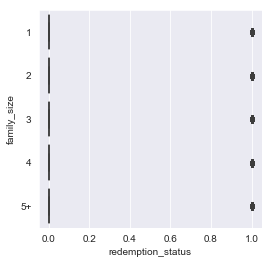

In [103]:
plt.figure(figsize = (4,4))
sns.boxplot( x = 'redemption_status', y = 'family_size', data = df1)

In [104]:
df1 = df1.dropna(how='any',axis=0) 

In [111]:
df1 = df1.drop(['age_range'], axis = 1)

In [ ]:
df1['Age'] = df1.

In [108]:
df1.shape

(25394, 11)

In [116]:
df1.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,marital_status,rented,family_size,income_bracket,campaign_type
1,2,13,116,48,0,0,0.0,2,3.0,0
2,6,9,635,205,0,0,0.0,2,7.0,1
4,9,8,1017,1489,0,0,0.0,2,3.0,0
9,19,2,559,679,0,1,1.0,2,4.0,1
12,22,9,705,712,0,0,0.0,3,5.0,1


In [121]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df1['marital_status']= label_encoder.fit_transform(df1['marital_status']) 
df1['campaign_type']= label_encoder.fit_transform(df1['campaign_type']) 
df1['family_size']= label_encoder.fit_transform(df1['family_size']) 

In [122]:
y = df1['redemption_status']
X = df1.drop(['redemption_status'], axis = 1)

In [123]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state = 1, stratify=y)

In [124]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 10,min_samples_split=10,min_samples_leaf = 1, max_features = 'sqrt',
                             max_depth=None, bootstrap =True)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
pred_y_1 = rfc.predict(X_test)
 
# Is our model still predicting just one class?
print(accuracy_score(y_test, pred_y_1))
confusion_matrix(y_test, pred_y_1)

0.9856670341786108


array([[6258,    1],
       [  90,    0]], dtype=int64)

In [128]:
#NearMiss--------------------------------------------------------------------------------
from imblearn.under_sampling import NearMiss
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)
np.bincount(y_train)

array([268, 268], dtype=int64)

In [129]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators = 173,min_samples_split=29,min_samples_leaf = 5, max_features = 'sqrt',
                             max_depth=3, bootstrap =True)
rfc.fit(X_train, y_train)

 
# Predict on training set
pred_y_1 = rfc.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_1) )

[0 1]
0.4666876673491889


[0.36491494 0.03524898 0.24313186 0.35670422]


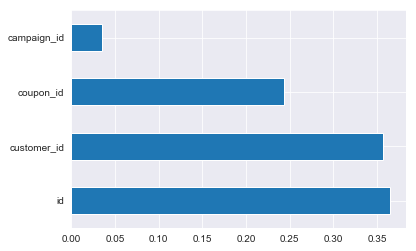

In [39]:
import pandas as pd
import numpy as np
data = train
X = data.iloc[:,0:4]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [28]:
train['redemption_status'].value_counts()/len(train)

0    0.990698
1    0.009302
Name: redemption_status, dtype: float64

In [21]:
train.id.nunique(),train.customer_id.nunique(),train.coupon_id.nunique(),train.campaign_id.nunique()

(78369, 1428, 866, 18)

In [22]:
# transaction.head()
for k in transaction.columns:
    print(k,transaction[k].nunique())
    
transaction.head()

date 549
customer_id 1582
item_id 74063
quantity 9252
selling_price 4923
other_discount 1418
coupon_discount 232


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [12]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [14]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [40]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [50]:
transaction.shape

(1324566, 7)

In [24]:
for k in customer.columns:
    print(k,customer[k].nunique())
customer.head()

customer_id 760
age_range 6
marital_status 2
rented 2
family_size 5
no_of_children 3
income_bracket 12


,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [ ]:
customer_transaction_data